<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regress√£o Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descri√ß√£o:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobili√°rio vem sendo objeto de diversos estudos e pesquisas nos √∫ltimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cen√°rio incentiva o aumento do interesse por estudos de previs√£o de demanda baseados em caracter√≠sticas deste mercado, dos im√≥veis e do entorno destes im√≥veis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto √© desenvolver um sistema de avalia√ß√£o imobili√°ria utilizando a metodologia de regress√µes lineares que √© uma das t√©cnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* √© uma amostra aleat√≥ria de tamanho 5000 de im√≥veis dispon√≠veis para venda no munic√≠pio do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do im√≥vel</li>
    <li><b>Area</b> - √Årea do im√≥vel em m¬≤</li>
    <li><b>Dist_Praia</b> - Dist√¢ncia do im√≥vel at√© a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Dist√¢ncia do im√≥vel at√© a farm√°cia mais pr√≥xima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [2]:
df_imoveis = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [3]:
df_imoveis.head()

Valor  Area  Dist_Praia  Dist_Farmacia
0  4600000   280    0.240925       0.793637
1   900000   208    0.904136       0.134494
2  2550000   170    0.059525       0.423318
3   550000   100    2.883181       0.525064
4  2200000   164    0.239758       0.192374

In [4]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## Verificando o tamanho do dataset

In [5]:
df_imoveis.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 An√°lises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estat√≠sticas descritivas

In [6]:
df_imoveis.describe().round(2)

Valor     Area  Dist_Praia  Dist_Farmacia
count      5000.00  5000.00     5000.00        5000.00
mean    1402926.39   121.94        3.02           0.50
std     1883268.85    90.54        3.17           0.29
min       75000.00    16.00        0.00           0.00
25%      460000.00    70.00        0.44           0.24
50%      820000.00    93.00        1.48           0.50
75%     1590000.00   146.00        5.61           0.75
max    25000000.00  2000.00       17.96           1.00

## Matriz de correla√ß√£o

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correla√ß√£o</b> √© uma medida de associa√ß√£o linear entre duas vari√°veis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associa√ß√£o negativa perfeita e <b>+1</b> indica associa√ß√£o positiva perfeita.</p>

In [7]:
df_imoveis.corr().round(4)

Valor    Area  Dist_Praia  Dist_Farmacia
Valor          1.0000  0.7110     -0.3665        -0.0244
Area           0.7110  1.0000     -0.2834        -0.0310
Dist_Praia    -0.3665 -0.2834      1.0000         0.0256
Dist_Farmacia -0.0244 -0.0310      0.0256         1.0000

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Vari√°vel Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn √© uma biblioteca Python de visualiza√ß√£o de dados baseada no matplotlib. Ela fornece uma interface de alto n√≠vel para desenhar gr√°ficos estat√≠sticos.</p>

In [8]:
import seaborn as sns

## Configura√ß√µes de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

* Lista completa de todos os valores de style que voc√™ pode escolher:</br>
darkgrid, whitegrid, dark, white, and ticks
|style|
|---|
|darkgrid|
|whitegrid|
|dark|
|white|
|ticks|

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

* Lista completa de todos os valores da paleta que voc√™ pode escolher:</br>
|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|
|---|---|---|---|---|---|---|---|---|---|
|Accent|Accent_r|Blues|Blues_r|BrBG|BrBG_r|BuGn|BuGn_r|BuPu|BuPu_r|
|CMRmap|CMRmap_r|Dark2|Dark2_r|GnBu|GnBu_r|Greens|Greens_r|Greys|Greys_r|
|OrRd|OrRd_r|Oranges|Oranges_r|PRGn|PRGn_r|Paired|Paired_r|Pastel1|Pastel1_r|
|Pastel2|Pastel2_r|PiYG|PiYG_r|PuBu|PuBuGn|PuBuGn_r|PuBu_r|PuOr|PuOr_r|
|PuRd|PuRd_r|Purples|Purples_r|RdBu|RdBu_r|RdGy|RdGy_r|RdPu|RdPu_r|
|RdYlBu|RdYlBu_r|RdYlGn|RdYlGn_r|Reds|Reds_r|Set1|Set1_r|Set2|Set2_r|
|Set3|Set3_r|Spectral|Spectral_r|Wistia|Wistia_r|YlGn|YlGnBu|YlGnBu_r|YlGn_r|
|YlOrBr|YlOrBr_r|YlOrRd|YlOrRd_r|afmhot|afmhot_r|autumn|autumn_r|binary|binary_r|
|bone|bone_r|brg|brg_r|bwr|bwr_r|cividis|cividis_r|cool|cool_r|
|coolwarm|coolwarm_r|copper|copper_r|cubehelix|cubehelix_r|flag|flag_r|gist_earth|gist_earth_r|
|gist_gray|gist_gray_r|gist_heat|gist_heat_r|gist_ncar|gist_ncar_r|gist_rainbow|gist_rainbow_r|gist_stern|gist_stern_r|
|gist_yarg|gist_yarg_r|gnuplot|gnuplot2|gnuplot2_r|gnuplot_r|gray|gray_r|hot|hot_r|
|hsv|hsv_r|icefire|icefire_r|inferno|inferno_r|magma|magma_r|mako|mako_r|
|nipy_spectral|nipy_spectral_r|ocean|ocean_r|pink|pink_r|plasma|plasma_r|prism|prism_r|
|rainbow|rainbow_r|rocket|rocket_r|seismic|seismic_r|spring|spring_r|summer|summer_r|
|tab10|tab10_r|tab20|tab20_r|tab20b|tab20b_r|tab20c|tab20c_r|terrain|terrain_r|
|twilight|twilight_r|twilight_shifted|twilight_shifted_r|viridis|viridis_r|vlag|vlag_r|winter|winter_r|

In [9]:
# style => darkgrid, whitegrid, dark, white, and ticks
sns.set_style('darkgrid')

# palette => configurando como coolwarm
sns.set_palette('Set2')

## Box plot da vari√°vel *dependente* (y)
As estat√≠sticas descritivas necess√°rias para se construir um box-plot s√£o:
* 1¬∫ quartil
* mediana
* 3¬∫ quartil

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Pre√ßo dos Im√≥veis'}, xlabel='Reais'>

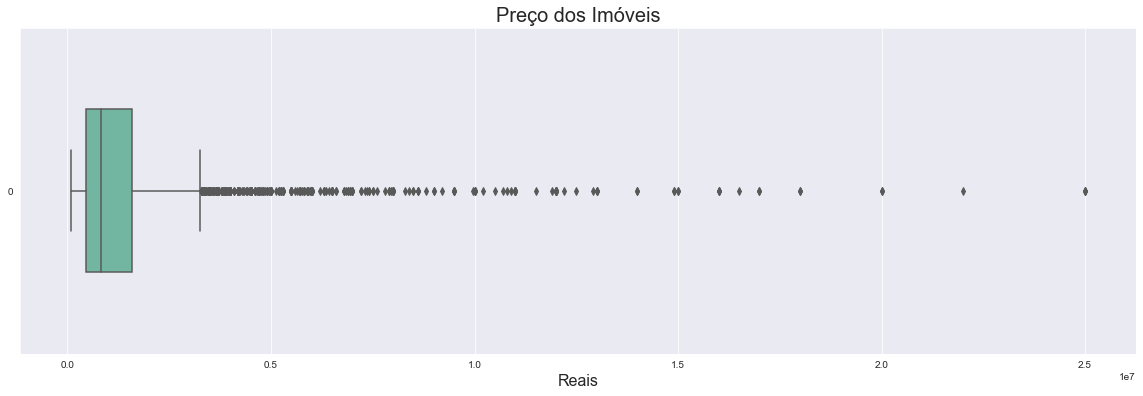

In [10]:
ax = sns.boxplot(data=df_imoveis['Valor'], orient='h', width=0.5)
ax.figure.set_size_inches(20, 6)
ax.set_title('Pre√ßo dos Im√≥veis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribui√ß√£o de Frequ√™ncias</font>
<hr style='border: 2px solid red;'>

## Distribui√ß√£o de frequ√™ncias da vari√°vel *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias'}, xlabel='Pre√ßo dos Im√≥veis (R$)', ylabel='Count'>

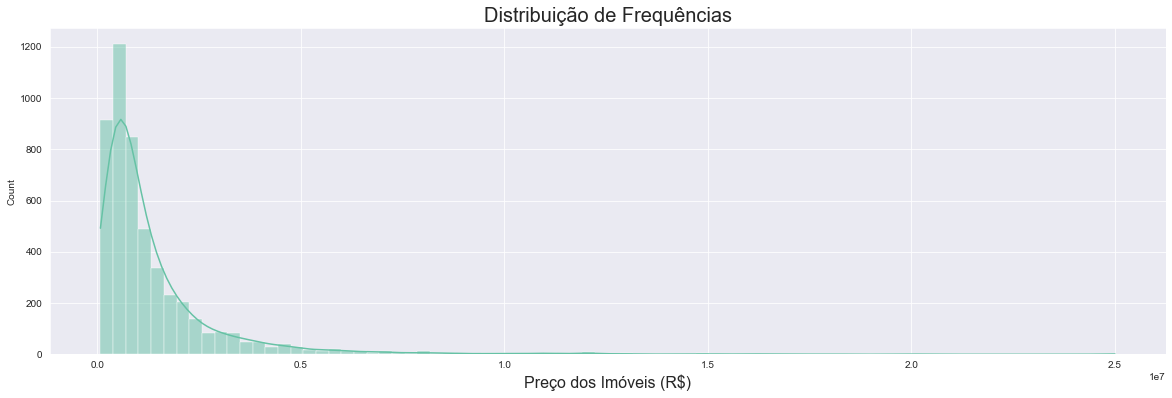

In [11]:
ax = sns.histplot(data=df_imoveis['Valor'], kde=True, bins=80)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribui√ß√£o de Frequ√™ncias', fontsize=20)
ax.set_xlabel('Pre√ßo dos Im√≥veis (R$)', fontsize=16)
ax

<img width='800px' src='../Dados/img/Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispers√£o Entre as Vari√°veis</font>
<hr style='border: 2px solid red;'>

## Gr√°ficos de dispers√£o entre as vari√°veis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de vari√°veis em um dataset.</p>

In [12]:
df_imoveis.columns

Index(['Valor', 'Area', 'Dist_Praia', 'Dist_Farmacia'], dtype='object')

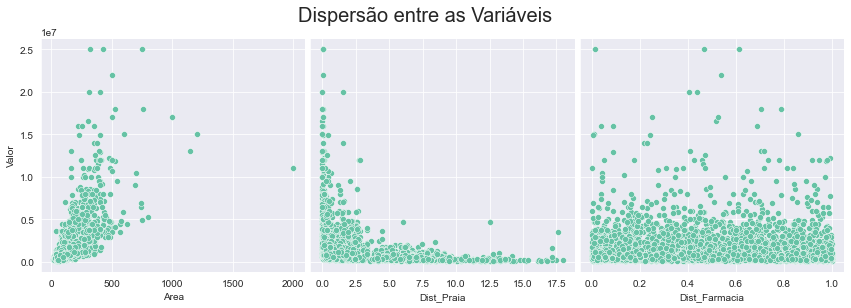

In [13]:
ax = sns.pairplot(df_imoveis, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=4)
ax.fig.suptitle('Dispers√£o entre as Vari√°veis', fontsize=20, y=1.05)
ax

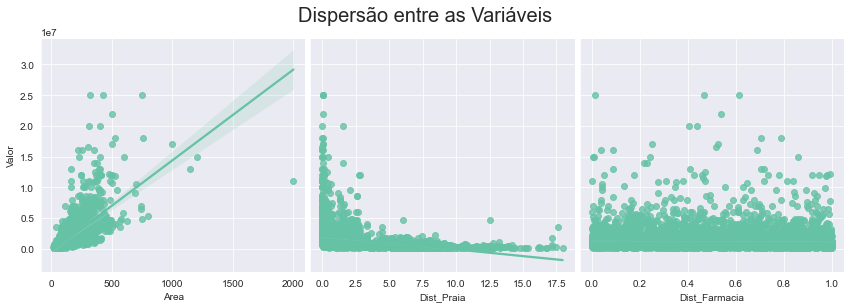

In [14]:
ax = sns.pairplot(df_imoveis, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispers√£o entre as Vari√°veis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribui√ß√£o Normal
<hr>

### Por qu√™? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes param√©tricos assumem que os dados amostrais foram coletados de uma popula√ß√£o com distribui√ß√£o de probabilidade conhecida. Boa parte dos testes estat√≠sticos assumem que os dados seguem uma distribui√ß√£o normal (t de Student, intervalos de confian√ßa etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [15]:
import numpy as np

## Aplicando a transforma√ß√£o logar√≠tmica aos dados do *dataset*

Um dos principais motivos de se transformar alguns tipos de dados √© para tentar corrigir a assimetria que tais informa√ß√µes apresentam quando observadas em n√≠vel.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [16]:
# A curva logar√≠timica nunca toca no ZERO, por isso Log(0) √© -infinito
print(f'Log(0) - {np.log(0)}')
print(f'Log(1) - {np.log(1)}')

Log(0) - -inf
Log(1) - 0.0


C:\Users\renat\AppData\Local\Temp/ipykernel_12564/3594603296.py:2: RuntimeWarning: divide by zero encountered in log
  print(f'Log(0) - {np.log(0)}')


In [17]:
df_imoveis['log_Valor']      = np.log(df_imoveis['Valor'])
df_imoveis['log_Area']       = np.log(df_imoveis['Area'])

# Dist_Praia possui valor ZERO, para evitar -inf somamos +1, onde log(1) volta a ser 0
df_imoveis['log_Dist_Praia'] = np.log(df_imoveis['Dist_Praia'] + 1) 

# Dist_Farmacia possui valor ZERO, para evitar -inf somamos +1, onde log(1) volta a ser 0
df_imoveis['log_Dist_Farmacia'] = np.log(df_imoveis['Dist_Farmacia'] + 1) 

In [18]:
df_imoveis.head()

Valor  Area  Dist_Praia  Dist_Farmacia  log_Valor  log_Area  \
0  4600000   280    0.240925       0.793637  15.341567  5.634790   
1   900000   208    0.904136       0.134494  13.710150  5.337538   
2  2550000   170    0.059525       0.423318  14.751604  5.135798   
3   550000   100    2.883181       0.525064  13.217674  4.605170   
4  2200000   164    0.239758       0.192374  14.603968  5.099866   

   log_Dist_Praia  log_Dist_Farmacia  
0        0.215857           0.584245  
1        0.644028           0.126187  
2        0.057821           0.352991  
3        1.356655           0.422036  
4        0.214916           0.175946

## Distribui√ß√£o de frequ√™ncias da vari√°vel *dependente transformada* (y)
<font color='red'>Conseguimos eliminar aquele efeito de assimetria √† direita. Inclusive, obtivemos um gr√°fico pr√≥ximo √† distribui√ß√£o normal, que estamos tentando alcan√ßar.</font>

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias'}, xlabel='log do Pre√ßo dos Im√≥veis', ylabel='Count'>

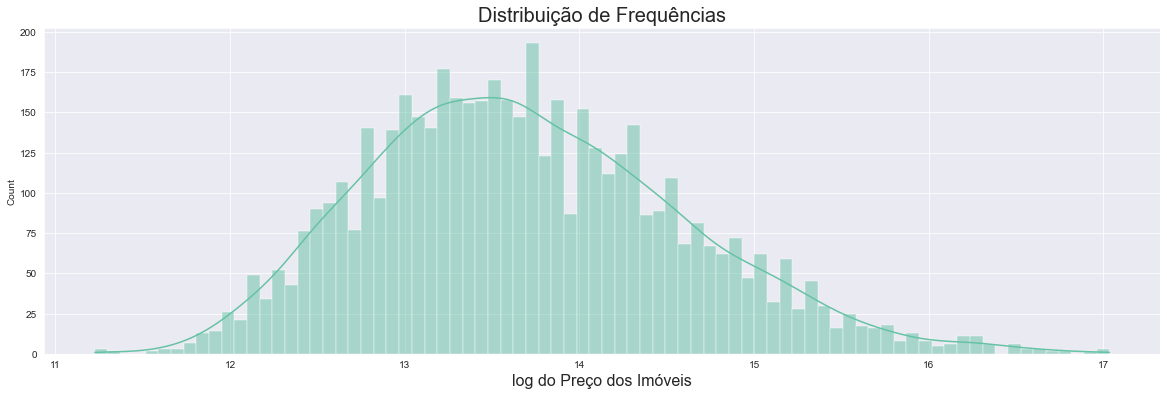

In [19]:
ax = sns.histplot(data=df_imoveis['log_Valor'], kde=True, bins=80)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribui√ß√£o de Frequ√™ncias', fontsize=20)
ax.set_xlabel('log do Pre√ßo dos Im√≥veis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Rela√ß√£o Linear</font>
<hr style='border: 2px solid red;'>

## Gr√°ficos de dispers√£o entre as vari√°veis transformadas do dataset

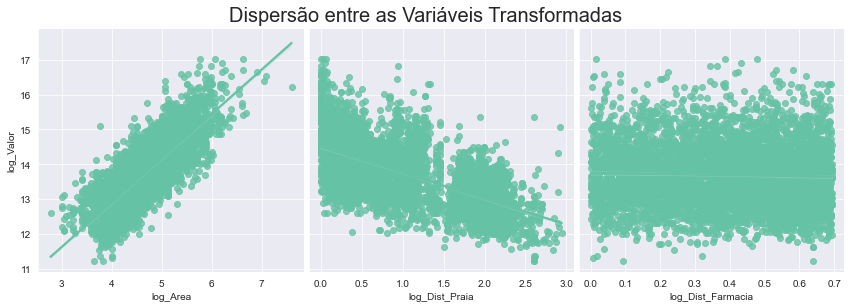

In [20]:
ax = sns.pairplot(df_imoveis, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispers√£o entre as Vari√°veis Transformadas', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Pre√ßo dos Im√≥veis (y)

In [22]:
y = df_imoveis['log_Valor']

## Criando um DataFrame (pandas) para armazenar as vari√°veis explicativas (X)

In [23]:
X = df_imoveis[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2811)

# Regres√£o Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A an√°lise de regress√£o diz respeito ao estudo da depend√™ncia de uma vari√°vel (a vari√°vel <b>dependente</b>) em rela√ß√£o a uma ou mais vari√°veis, as vari√°veis explanat√≥rias, visando estimar e/ou prever o valor m√©dio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* √© um m√≥dulo Python especializado em solu√ß√µes para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [25]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [26]:
X_train_com_constante = sm.add_constant(X_train)

C:\Users\renat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
X_train.head()

log_Area  log_Dist_Praia  log_Dist_Farmacia
2661  5.945421        0.000000           0.382273
912   3.135494        0.972865           0.605015
3042  4.317488        1.794961           0.486594
141   3.401197        0.310455           0.599609
3854  5.676754        0.032193           0.101903

In [28]:
X_train_com_constante.head()

const  log_Area  log_Dist_Praia  log_Dist_Farmacia
2661    1.0  5.945421        0.000000           0.382273
912     1.0  3.135494        0.972865           0.605015
3042    1.0  4.317488        1.794961           0.486594
141     1.0  3.401197        0.310455           0.599609
3854    1.0  5.676754        0.032193           0.101903

In [29]:
# Estimando o modelo com statsmodels
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hascont=True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estat√≠sticas de teste do modelo

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:41   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

<font color='blue'>
O <b>teste F</b> √© utilizado para testar simultaneamente a signific√¢ncia de um conjunto de par√¢metros.</br>
O <b>teste t</b> √© utilizado para testar a signific√¢ncia de cada par√¢metro individualmente.
</font>

<font color='red'><b>Estat√≠stica de Resumo Utilizando o M√©todo dos M√≠nimos Quadrados Ordin√°rios OLS (do ingl√™s Ordinary Least Squares)</b></font>
* <font color='red'> <b>No. Observations   - </b>N√∫mero de observa√ß√µes</font>
* <font color='red'> <b>R-squared          - </b>R2, alcan√ßamos 80% </font>
* <font color='red'> <b>Adj. R-squared     - </b>R2 ajustado, considera os graus de liberdade, ou seja, se colocarmos muitas vari√°veis ele vai diminuindo seu grau de liberdade.</font>
* <font color='red'> <b>F-statistic        - </b>√© o teste F, um importante testes de hip√≥tese - que testa a signific√¢ncia de todos os par√¢metros do modelo em conjunto</font>
* <font color='red'> <b>Prob (F-statistic) - </b>valores acima de 0.05, rejeitamos o modelo.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de vari√°veis explicativas (X)

In [31]:
# log_Dist_Farmacia n√£o √© significativo - P>|t| = 0.603 > 0.5
X2 = df_imoveis[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [33]:
X2_train_com_constante = sm.add_constant(X2_train)
modelo_statsmodels = sm.OLS(y_train, X2_train_com_constante, hascont=True).fit()

C:\Users\renat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Avaliando as estat√≠sticas de teste do novo modelo

In [34]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [46]:
modelo_reg = LinearRegression()

## Utilizando o m√©todo *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [109]:
modelo_reg.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determina√ß√£o (R¬≤) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determina√ß√£o - R¬≤

O coeficiente de determina√ß√£o (R¬≤) √© uma medida resumida que diz quanto a linha de regress√£o ajusta-se aos dados. √â um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [53]:
# Exatamente o mesmo encontrado no statsmodel - 80,5%
print(f'R¬≤ base de treino = {modelo_reg.score(X2_train, y2_train).round(3)}')

R¬≤ = 0.805


## Gerando previs√µes para os dados de TESTE (X_test) utilizando o m√©todo *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [54]:
y_previsto = modelo_reg.predict(X2_test)

## Obtendo o coeficiente de determina√ß√£o (R¬≤) para as previs√µes do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [55]:
print(f'R¬≤ base de test = {metrics.r2_score(y2_test, y_previsto).round(3)}')

R¬≤ base de test = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previs√µes Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [60]:
entrada = X2_test[0:1]
entrada

log_Area  log_Dist_Praia
1006     5.273        1.282769

## Gerando previs√£o pontual

In [68]:
print(f'Valor previsto na base logar√≠tmica - {modelo_reg.predict(entrada)[0]}')
print(f'Valor alvo     na base logar√≠tmica - {y2_test.iloc[0]}')

Valor previsto na base logar√≠tmica - 14.284820061847878
Valor alvo     na base logar√≠tmica - 15.150511624696614


## Invertendo a transforma√ß√£o para obter a estimativa em R$
A fun√ß√£o exponencial √© a inversa da logar√≠tmica natural que utilizamos em nossos dados.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [69]:
print(f'Valor previsto do im√≥vel em Reais - {np.exp(modelo_reg.predict(entrada)[0])}')
print(f'Valor alvo     do im√≥vel em Reais - {np.exp(y2_test.iloc[0])}')

Valor previsto do im√≥vel em Reais - 1598889.7847794362
Valor alvo     do im√≥vel em Reais - 3800000.0000000005


## Criando um simulador simples

In [72]:
Area = 250
Dist_Praia = 1

entrada = [[np.log(Area), np.log(Dist_Praia +1)]]

print(f'Valor previsto do im√≥vel em Reais - {np.exp(modelo_reg.predict(entrada)[0]).round(2)}')

Valor previsto do im√≥vel em Reais - 2777292.84


# <font color='red' style='font-size: 30px;'>5.3 Interpreta√ß√£o dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito m√©dio em $Y$ (Pre√ßo do Im√≥veis) tendo todas as vari√°veis explicativas exclu√≠das do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da fun√ß√£o exponencial para ser apresentado em R$.</p>

In [74]:
# Intercepto na base logaritmica
modelo_reg.intercept_

9.334916409800334

In [77]:
# intercepto em Reais R$
np.exp(modelo_reg.intercept_).round(2)

11326.68

## Obtendo os coeficientes de regress√£o

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regress√£o</b> $\beta_2$ e $\beta_3$ s√£o conhecidos como <b>coeficientes parciais de regress√£o</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, √© que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em rela√ß√£o a $X_2$ e $X_3$, isto √©, a varia√ß√£o percentual de Y correspondente a uma dada varia√ß√£o percentual (pequena) em $X_2$ e $X_3$.</p>

In [80]:
X2.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [102]:
# coeficientes de regress√£o ùõΩ2 e ùõΩ3 na base logaritmica
# um acr√©scimo de 1% na √Årea de um im√≥vel gera, em m√©dia, um acr√©scimo de 1.06% no Pre√ßo do Im√≥vel
# um acr√©scimo de 1% na Dist√¢ncia de um im√≥vel at√© a praia gera, em m√©dia, um decr√©scimo de 0.49% no Pre√ßo do Im√≥vel
modelo_reg.coef_.round(2)

array([ 1.06, -0.49])

## Criando uma lista com os nomes das vari√°veis do modelo

In [81]:
index = ['Intercepto', '√Årea (m¬≤)', 'Dist√¢ncia at√© a Praia (km)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [103]:
pd.DataFrame(data=np.append(np.exp(modelo_reg.intercept_),  modelo_reg.coef_.round(2)), index=index, columns=['Coeficientes Estimados']).T

Intercepto  √Årea (m¬≤)  Dist√¢ncia at√© a Praia (km)
Coeficientes Estimados  11326.681428       1.06                       -0.49

## Interpreta√ß√£o dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> ‚Üí Excluindo o efeito das vari√°veis explicativas ($X_2=X_3=0$) o efeito m√©dio no Pre√ßo dos Im√≥veis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>√Årea (m¬≤)</b> ‚Üí Mantendo-se o valor de $X_3$ (Dist√¢ncia at√© a Praia) constante, um acr√©scimo de 1% na √Årea de um im√≥vel gera, em m√©dia, um acr√©scimo de <b>1.06%</b> no Pre√ßo do Im√≥vel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Dist√¢ncia at√© a Praia (km)</b> ‚Üí Mantendo-se o valor de $X_2$ (√Årea) constante, um acr√©scimo de 1% na Dist√¢ncia de um im√≥vel at√© a praia gera, em m√©dia, um decr√©scimo de <b>0.49%</b> no Pre√ßo do Im√≥vel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 An√°lises Gr√°ficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previs√µes do modelo para os dados de TREINO

In [127]:
y_previsto = modelo_reg.predict(X2_train)

## Gr√°fico de dispers√£o entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previs√£o X Real'}, xlabel='log do Pre√ßo - Previs√£o', ylabel='log do Pre√ßo - Real'>

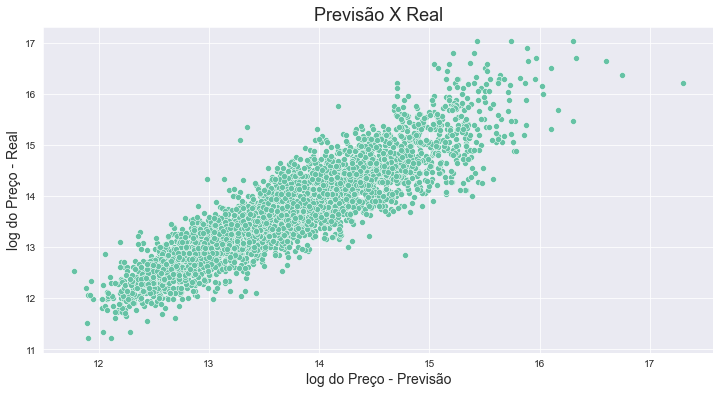

In [128]:
ax = sns.scatterplot(x=y_previsto, y=y2_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previs√£o X Real', fontsize=18)
ax.set_xlabel('log do Pre√ßo - Previs√£o', fontsize=14)
ax.set_ylabel('log do Pre√ßo - Real', fontsize=14)
ax

## Obtendo os res√≠duos

In [113]:
residuos = y2_train - y_previsto

## Plotando a distribui√ß√£o de frequ√™ncias dos res√≠duos

<AxesSubplot:title={'center':'Distribui√ß√£o de Frequ√™ncias dos Res√≠duos'}, xlabel='log do Pre√ßo', ylabel='Count'>

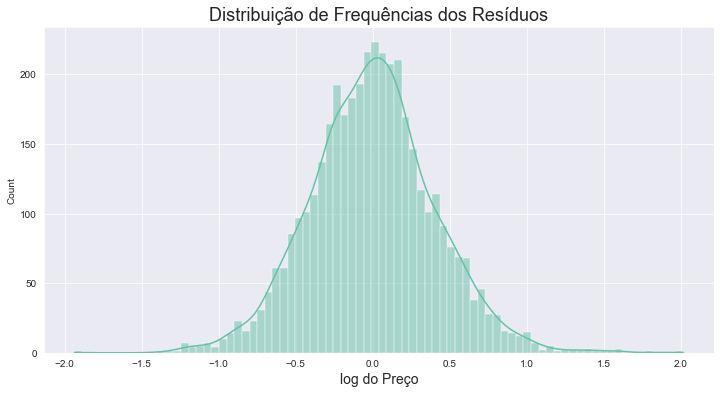

In [115]:
ax = sns.histplot(data=residuos, kde=True, bins=80)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribui√ß√£o de Frequ√™ncias dos Res√≠duos', fontsize=18)
ax.set_xlabel('log do Pre√ßo', fontsize=14)
ax

## Gr√°fico de dispers√£o entre valor estimado e res√≠duos

M√©todo informal de verifica√ß√£o da hip√≥tese de vari√¢ncia constante dos res√≠duos (homocedasticidade)</br>
Esperado m√©dia zero</br>
Visualiza√ß√£o da varia√ß√£o</br>

<AxesSubplot:title={'center':'Res√≠duos x Log do Valor Previsto'}, xlabel='Res√≠duos'>

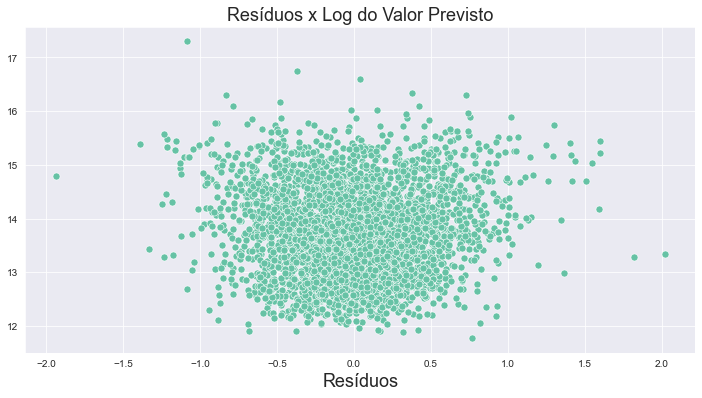

In [124]:
ax = sns.scatterplot(x=residuos, y=y_previsto, s=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Res√≠duos x Log do Valor Previsto', fontsize=18)
ax.set_xlabel('Res√≠duos', fontsize=18)
ax